<a href="https://colab.research.google.com/github/TietNguyenHoangTanDat/AI-SangT5/blob/main/cifar100_week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from keras.datasets import cifar100
(train_images, train_labels),(test_images, test_labels) = cifar100.load_data()

In [25]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


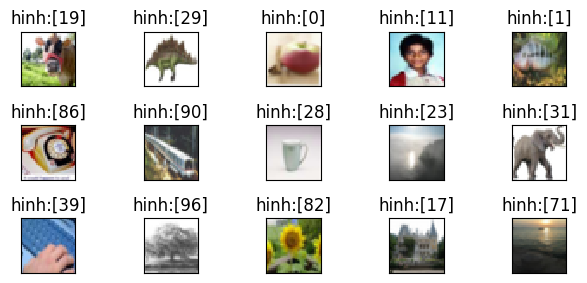

In [30]:
for i in range(15):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap = 'gray',interpolation = 'none')
  plt.title('hinh:{}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

Day la:  [29]


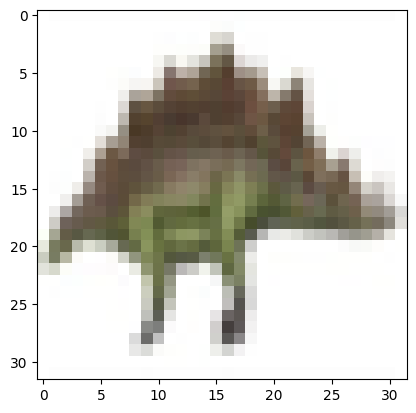

In [26]:
import matplotlib.pyplot as plt
hinh = train_images[1]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show
print("Day la: ", train_labels[1])

In [6]:
from keras.engine.sequential import Sequential
from keras import models
from keras.layers import Dense
model = Sequential()
model.add(Dense(4700,activation='relu', input_shape=(32*32*3,), name = 'lop_1'))
model.add(Dense(100,activation = 'softmax', name = 'lop_m'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lop_1 (Dense)               (None, 4700)              14443100  
                                                                 
 lop_m (Dense)               (None, 100)               470100    
                                                                 
Total params: 14,913,200
Trainable params: 14,913,200
Non-trainable params: 0
_________________________________________________________________


In [7]:
train_images = train_images.reshape((50000,32*32*3))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000,32*32*3))
test_images = test_images.astype('float32')/255
from keras.utils import to_categorical # one hot enread.ry
train_labels = to_categorical(train_labels,100)
test_labels = to_categorical(test_labels,100)

In [8]:
model.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])
model.fit(train_images, train_labels,epochs= 30, batch_size= 1000)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/30
50/50 [==============================] - 74s 1s/step - loss: 7.6786 - accuracy: 0.0288
Epoch 2/30
50/50 [==============================] - 63s 1s/step - loss: 4.2236 - accuracy: 0.0625
Epoch 3/30
50/50 [==============================] - 63s 1s/step - loss: 4.0031 - accuracy: 0.0935
Epoch 4/30
50/50 [==============================] - 62s 1s/step - loss: 3.8879 - accuracy: 0.1103
Epoch 5/30
50/50 [==============================] - 63s 1s/step - loss: 3.7824 - accuracy: 0.1276
Epoch 6/30
50/50 [==============================] - 63s 1s/step - loss: 3.7115 - accuracy: 0.1426
Epoch 7/30
50/50 [==============================] - 62s 1s/step - loss: 3.6338 - accuracy: 0.1567
Epoch 8/30
50/50 [==============================] - 68s 1s/step - loss: 3.5764 - accuracy: 0.1636
Epoch 9/30
50/50 [==============================] - 64s 1s/step - loss: 3.5173 - accuracy: 0.1751
Epoch 10/30
50/50 [==============================] - 61s 1s/step - loss: 3.4722 - accuracy: 0.1820
Epoch 11/30
50/50 [

In [9]:
model.save('cifar100.h5')

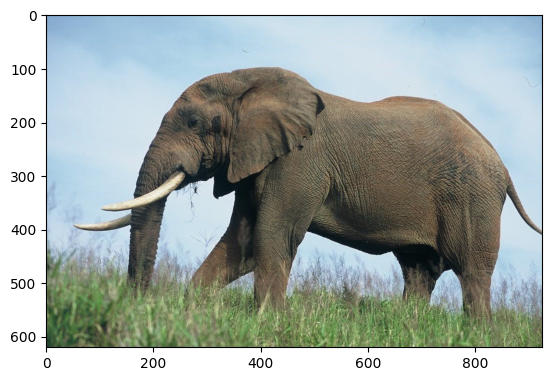

In [34]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
import numpy as np

from PIL import Image

img = Image.open('ele.jpg')
imshow(img)


1/1 [==============================] - 0s 35ms/step


array([31])

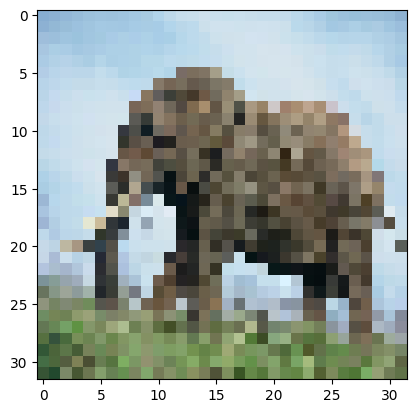

In [35]:
img = load_img('ele.jpg', target_size= (32,32))
plt.imshow(img, cmap = 'gray',interpolation= 'none')
img = img_to_array(img)
img = img.reshape((1,32*32*3))
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis= 1)